In [83]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
Patients= pd.read_csv("patients.csv")
Patients.head(2)

,Id,BIRTHDATE,DEATHDATE,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
0,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,nonhispanic,F,Wakefield Massachusetts US,510 Little Station Unit 69,Quincy,Massachusetts,Norfolk County,2186.0,42.290937,-70.975503
1,6e5ae27c-8038-7988-e2c0-25a103f01bfa,1940-02-19,NaN,Mr.,Zane918,Hodkiewicz467,NaN,NaN,M,white,nonhispanic,M,Brookline Massachusetts US,747 Conn Throughway,Boston,Massachusetts,Suffolk County,2135.0,42.308831,-71.063162


In [8]:
Encounter=pd.read_csv("encounters.csv")
Encounter.head(2)

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,1018.02,0.0,NaN,NaN
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,2619.36,0.0,NaN,NaN


In [10]:
Payer=pd.read_csv("payers.csv")
Payer.head(2)

,Id,NAME,ADDRESS,CITY,STATE_HEADQUARTERED,ZIP,PHONE
0,b3221cfc-24fb-339e-823d-bc4136cbc4ed,Dual Eligible,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323
1,7caa7254-5050-3b5e-9eae-bd5ea30e809c,Medicare,7500 Security Blvd,Baltimore,MD,21244.0,1-800-633-4227


In [11]:
Procedure=pd.read_csv("procedures.csv")
Procedure.head(2)

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,32c84703-2481-49cd-d571-3899d5820253,265764009,Renal dialysis (procedure),903,NaN,NaN
1,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,d9ec2e44-32e9-9148-179a-1653348cc4e2,c98059da-320a-c0a6-fced-c8815f3e3f39,76601001,Intramuscular injection,2477,NaN,NaN


In [12]:
Patients.info

<bound method DataFrame.info of                                        Id   BIRTHDATE   DEATHDATE PREFIX  \
0    5605b66b-e92d-c16c-1b83-b8bf7040d51f  1977-03-19         NaN   Mrs.   
1    6e5ae27c-8038-7988-e2c0-25a103f01bfa  1940-02-19         NaN    Mr.   
2    8123d076-0886-9007-e956-d5864aa121a7  1958-06-04         NaN    Mr.   
3    770518e4-6133-648e-60c9-071eb2f0e2ce  1928-12-25  2017-09-29    Mr.   
4    f96addf5-81b9-0aab-7855-d208d3d352c5  1928-12-25  2014-02-23    Mr.   
..                                    ...         ...         ...    ...   
969  d684571e-a784-ef61-429e-06fa0d2b1637  1924-03-15         NaN    Mr.   
970  13c6f26e-17b7-f534-04db-78a26b26018d  1940-10-31         NaN   Mrs.   
971  521e998b-ff0e-767f-b0ee-2bdf1168d66c  1943-04-18         NaN    Mr.   
972  b57e24a2-2e48-12f9-3293-c88745cfdc3f  1941-04-28         NaN   Mrs.   
973  204f8028-72f8-d6f8-761f-79ebf9f02311  1923-02-14         NaN   Mrs.   

           FIRST           LAST SUFFIX       MAIDEN MAR

In [13]:
Patients.isna().sum()

Id              0
BIRTHDATE       0
DEATHDATE     820
PREFIX          0
FIRST           0
LAST            0
SUFFIX        953
MAIDEN        588
MARITAL         1
RACE            0
ETHNICITY       0
GENDER          0
BIRTHPLACE      0
ADDRESS         0
CITY            0
STATE           0
COUNTY          0
ZIP           142
LAT             0
LON             0
dtype: int64

In [14]:
Patients["Id"].nunique()

974

In [15]:
Patients["CITY"].nunique()

29

In [16]:
Patients['GENDER'].value_counts()


GENDER
M    494
F    480
Name: count, dtype: int64

In [17]:
Patients['DEATHDATE'].notna().sum()


np.int64(154)

In [18]:
from datetime import datetime
Patients['BIRTHDATE'] = pd.to_datetime(Patients['BIRTHDATE'], errors='coerce')

Patients['AGE'] = Patients['BIRTHDATE'].apply(
    lambda dob: (datetime.now().date() - dob.date()).days // 365 if pd.notnull(dob) else None
)
Patients['AGE'].head()

0    48
1    85
2    67
3    96
4    96
Name: AGE, dtype: int64

In [19]:
Patients["AGE"].mean()

np.float64(72.78850102669405)

In [26]:
Patients["AGE"].min()

np.int64(33)

In [27]:
Patients["AGE"].max()


np.int64(103)

In [30]:
(Patients["AGE"]<18).sum()

np.int64(0)

In [31]:
(Patients["AGE"]>18).sum()

np.int64(974)

In [36]:
((Patients['AGE'] >= 18) & (Patients['AGE'] < 65)).sum()

np.int64(353)

In [37]:
(Patients['AGE'] >= 65).sum()

np.int64(621)

In [39]:
Patients['AGE_GROUP'] = Patients['AGE'].apply(
    lambda age: 'Child' if age < 18 else 'Adult' if age < 65 else 'Senior'
)

Patients["AGE_GROUP"].head()

0     Adult
1    Senior
2    Senior
3    Senior
4    Senior
Name: AGE_GROUP, dtype: object

In [41]:
normalized_age = (Patients['AGE'] - Patients['AGE'].mean()) / Patients['AGE'].std()
normalized_age

0     -1.209418
1      0.595793
2     -0.282418
3      1.132477
4      1.132477
         ...   
969    1.376425
970    0.547003
971    0.449424
972    0.547003
973    1.425214
Name: AGE, Length: 974, dtype: float64

In [43]:
Patients['RACE'].value_counts().idxmax()


'white'

In [44]:
Patients['ETHNICITY'].value_counts().idxmax()

'nonhispanic'

In [48]:
Patients.loc[Patients['AGE'] > 80].head()

,Id,BIRTHDATE,DEATHDATE,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,AGE,AGE_GROUP
1,6e5ae27c-8038-7988-e2c0-25a103f01bfa,1940-02-19,NaN,Mr.,Zane918,Hodkiewicz467,NaN,NaN,M,white,...,Brookline Massachusetts US,747 Conn Throughway,Boston,Massachusetts,Suffolk County,2135.0,42.308831,-71.063162,85,Senior
3,770518e4-6133-648e-60c9-071eb2f0e2ce,1928-12-25,2017-09-29,Mr.,Abel832,Smitham825,NaN,NaN,M,white,...,Randolph Massachusetts US,127 Cole Way Unit 95,Boston,Massachusetts,Suffolk County,2118.0,42.334304,-71.066801,96,Senior
4,f96addf5-81b9-0aab-7855-d208d3d352c5,1928-12-25,2014-02-23,Mr.,Edwin773,Labadie908,NaN,NaN,M,white,...,Stow Massachusetts US,976 Ziemann Gateway,Boston,Massachusetts,Suffolk County,2125.0,42.346771,-71.058813,96,Senior
5,8e9650d1-788a-78f9-4a28-d08f7f95354a,1928-12-25,NaN,Mr.,Frankie174,Oberbrunner298,NaN,NaN,M,white,...,Boston Massachusetts US,303 Bechtelar Bypass Suite 26,Boston,Massachusetts,Suffolk County,2467.0,42.371026,-71.118107,96,Senior
9,ff331e5c-ab16-e218-f39a-63e11de1ed75,1927-07-10,NaN,Mr.,Eugene421,Abernathy524,NaN,NaN,M,native,...,Pembroke Massachusetts US,706 Connelly Track Unit 1,Boston,Massachusetts,Suffolk County,2111.0,42.358519,-71.078598,98,Senior


In [50]:
Patients.at[5, 'FIRST']


'Frankie174'

In [52]:
Patients.query("GENDER == 'F' and AGE > 60").head()


,Id,BIRTHDATE,DEATHDATE,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,AGE,AGE_GROUP
6,183df435-4190-060e-8f8e-bf63c572b266,1957-11-08,NaN,Mrs.,Eilene124,Walsh511,NaN,Wiegand701,M,asian,...,Beijing Beijing Municipality CN,235 Lang Parade,Cambridge,Massachusetts,Middlesex County,2142.0,42.358928,-71.156224,67,Senior
11,becb15c3-a135-8fb2-ea09-583043922a3a,1948-05-30,NaN,Mrs.,Stephanie963,Douglas31,NaN,Predovic534,M,white,...,Amesbury Massachusetts US,345 Carter Hollow,Boston,Massachusetts,Suffolk County,2132.0,42.348327,-71.096466,77,Senior
14,f2203fd5-1a2c-60cd-cae0-1416658880b6,1939-09-21,NaN,Mrs.,Edra310,Wehner319,NaN,Upton904,M,white,...,Fairhaven Massachusetts US,538 Hilpert Estate Apt 80,Boston,Massachusetts,Suffolk County,2131.0,42.335375,-71.058499,85,Senior
16,07e7f8a0-1bfd-3af8-2bd0-29f1dbe9633c,1923-03-16,NaN,Ms.,Norah104,Feeney44,NaN,NaN,S,white,...,Oxford Massachusetts US,865 Pollich Rest,Boston,Massachusetts,Suffolk County,2125.0,42.367438,-71.014511,102,Senior
19,5bd6c434-6f51-6e53-4d0f-8d3889f377da,1931-12-18,NaN,Mrs.,Celia938,Carter549,NaN,Crona259,M,asian,...,Attleboro Massachusetts US,773 Weissnat Route Unit 6,Boston,Massachusetts,Suffolk County,2111.0,42.324761,-70.998943,93,Senior


In [53]:
Patients.iloc[10:16]

,Id,BIRTHDATE,DEATHDATE,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,AGE,AGE_GROUP
10,affa7bf1-f4fc-d3f7-747c-db8f32d105cf,1933-05-08,NaN,Mr.,Jay242,Wisozk929,NaN,NaN,M,white,...,Boston Massachusetts US,471 Borer Estate,Boston,Massachusetts,Suffolk County,2124.0,42.320186,-71.145693,92,Senior
11,becb15c3-a135-8fb2-ea09-583043922a3a,1948-05-30,NaN,Mrs.,Stephanie963,Douglas31,NaN,Predovic534,M,white,...,Amesbury Massachusetts US,345 Carter Hollow,Boston,Massachusetts,Suffolk County,2132.0,42.348327,-71.096466,77,Senior
12,a8ceba15-ef47-da92-253d-185853ff6c34,1971-10-27,2021-03-26,Mrs.,Helene803,Kilback373,NaN,Walker122,M,white,...,New Bedford Massachusetts US,865 McLaughlin Underpass Apt 63,Boston,Massachusetts,Suffolk County,2114.0,42.340495,-71.101117,53,Adult
13,0e02b297-527d-b5ea-30e5-690c82541243,1983-04-11,NaN,Mr.,Maria750,Waelchi213,NaN,NaN,M,black,...,Salem Massachusetts US,584 Cormier Lodge Suite 70,Somerville,Massachusetts,Middlesex County,2145.0,42.346290,-71.106427,42,Adult
14,f2203fd5-1a2c-60cd-cae0-1416658880b6,1939-09-21,NaN,Mrs.,Edra310,Wehner319,NaN,Upton904,M,white,...,Fairhaven Massachusetts US,538 Hilpert Estate Apt 80,Boston,Massachusetts,Suffolk County,2131.0,42.335375,-71.058499,85,Senior
15,4d55540d-c43d-e6e8-5364-ec2509df31e3,1964-10-15,NaN,Mrs.,Mickie472,Champlin946,NaN,Hermann103,M,white,...,Chelsea Massachusetts US,1092 Schoen Grove Unit 66,Boston,Massachusetts,Suffolk County,2119.0,42.340496,-71.065487,60,Adult


In [54]:
Patients.query("GENDER == 'F' and AGE > 60")

,Id,BIRTHDATE,DEATHDATE,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,AGE,AGE_GROUP
6,183df435-4190-060e-8f8e-bf63c572b266,1957-11-08,NaN,Mrs.,Eilene124,Walsh511,NaN,Wiegand701,M,asian,...,Beijing Beijing Municipality CN,235 Lang Parade,Cambridge,Massachusetts,Middlesex County,2142.0,42.358928,-71.156224,67,Senior
11,becb15c3-a135-8fb2-ea09-583043922a3a,1948-05-30,NaN,Mrs.,Stephanie963,Douglas31,NaN,Predovic534,M,white,...,Amesbury Massachusetts US,345 Carter Hollow,Boston,Massachusetts,Suffolk County,2132.0,42.348327,-71.096466,77,Senior
14,f2203fd5-1a2c-60cd-cae0-1416658880b6,1939-09-21,NaN,Mrs.,Edra310,Wehner319,NaN,Upton904,M,white,...,Fairhaven Massachusetts US,538 Hilpert Estate Apt 80,Boston,Massachusetts,Suffolk County,2131.0,42.335375,-71.058499,85,Senior
16,07e7f8a0-1bfd-3af8-2bd0-29f1dbe9633c,1923-03-16,NaN,Ms.,Norah104,Feeney44,NaN,NaN,S,white,...,Oxford Massachusetts US,865 Pollich Rest,Boston,Massachusetts,Suffolk County,2125.0,42.367438,-71.014511,102,Senior
19,5bd6c434-6f51-6e53-4d0f-8d3889f377da,1931-12-18,NaN,Mrs.,Celia938,Carter549,NaN,Crona259,M,asian,...,Attleboro Massachusetts US,773 Weissnat Route Unit 6,Boston,Massachusetts,Suffolk County,2111.0,42.324761,-70.998943,93,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,7506d350-0f35-7c82-3b8a-d7aa80114352,1942-05-18,2018-03-29,Mrs.,Maren639,Breitenberg711,NaN,Ritchie586,M,white,...,Rehoboth Massachusetts US,460 Padberg Dale Apt 89,Boston,Massachusetts,Suffolk County,2131.0,42.325310,-71.091714,83,Senior
968,5936f828-81d9-1a90-03b1-cfe49183dba8,1942-05-18,NaN,Mrs.,Sunni15,Olson653,NaN,Nitzsche158,M,white,...,Boston Massachusetts US,797 Shanahan Center,Boston,Massachusetts,Suffolk County,2136.0,42.318959,-71.051754,83,Senior
970,13c6f26e-17b7-f534-04db-78a26b26018d,1940-10-31,NaN,Mrs.,Berneice173,Heaney114,NaN,Hermiston71,M,white,...,Templeton Massachusetts US,617 MacGyver Pathway,Boston,Massachusetts,Suffolk County,2152.0,42.331490,-71.039520,84,Senior
972,b57e24a2-2e48-12f9-3293-c88745cfdc3f,1941-04-28,NaN,Mrs.,Chrissy459,Rempel203,NaN,Beer512,M,asian,...,Needham Massachusetts US,366 Beer Crossroad,Cambridge,Massachusetts,Middlesex County,NaN,42.337040,-71.094676,84,Senior


In [57]:
Patients["DEATHDATE"].isna().sum()

np.int64(820)

In [60]:
Patients["Id"].count()

np.int64(974)

In [63]:
Total_Alive_Patients=((Patients["Id"].count())-Patients["DEATHDATE"].isna().sum())

Total_Alive_Patients

np.int64(154)

In [70]:
Encounter['TOTAL_CLAIM_COST'].mean()


np.float64(3639.6821741780504)

In [83]:
((Encounter['PAYER_COVERAGE'] == 0).mean() * 100).round(1)

np.float64(48.7)

In [75]:
Encounter['HIGH_COST'] = Encounter['TOTAL_CLAIM_COST'].apply(lambda x: x > 1000)
Encounter['HIGH_COST'].sum()

np.int64(9214)

In [76]:
Encounter['START'] = pd.to_datetime(Encounter['START'])
Encounter['STOP'] = pd.to_datetime(Encounter['STOP'])
Encounter['DURATION_MIN'] = (Encounter['STOP'] - Encounter['START']).dt.total_seconds() / 60
Encounter['DURATION_MIN']


0        212.00
1         17.05
2         15.00
3         15.00
4         15.00
          ...  
27886     15.00
27887     15.00
27888     15.00
27889     15.00
27890     15.00
Name: DURATION_MIN, Length: 27891, dtype: float64

In [78]:
Encounter['CLAIM_NORM'] = (Encounter['TOTAL_CLAIM_COST'] - Encounter['TOTAL_CLAIM_COST'].mean()) / Encounter['TOTAL_CLAIM_COST'].std()
Encounter['CLAIM_NORM']

0       -0.284790
1       -0.110837
2       -0.345235
3       -0.201556
4       -0.369880
           ...   
27886   -0.386084
27887    0.754830
27888    0.906471
27889   -0.350969
27890   -0.395377
Name: CLAIM_NORM, Length: 27891, dtype: float64

In [84]:
np.percentile(Encounter['TOTAL_CLAIM_COST'].dropna(), 90)

np.float64(12888.58)

In [109]:
costs = Encounter['TOTAL_CLAIM_COST'].dropna()
costs

In [110]:
z_scores = (costs - costs.mean()) / costs.std()
Encounter['z_scores'] = z_scores.reindex(Encounter.index)
Encounter['z_scores']


0       -0.284790
1       -0.110837
2       -0.345235
3       -0.201556
4       -0.369880
           ...   
27886   -0.386084
27887    0.754830
27888    0.906471
27889   -0.350969
27890   -0.395377
Name: z_scores, Length: 27891, dtype: float64

In [115]:
Encounter['IS_HIGH_COST'] = Encounter['z_scores'] > 2.5
Encounter['IS_HIGH_COST']

0        False
1        False
2        False
3        False
4        False
         ...  
27886    False
27887    False
27888    False
27889    False
27890    False
Name: IS_HIGH_COST, Length: 27891, dtype: bool

In [117]:
(Encounter['DURATION_MIN'] > 60).sum()


np.int64(4081)

In [118]:
Encounter['ENCOUNTERCLASS'].value_counts()

ENCOUNTERCLASS
ambulatory    12537
outpatient     6300
urgentcare     3666
emergency      2322
wellness       1931
inpatient      1135
Name: count, dtype: int64

In [119]:
Encounter.groupby('ENCOUNTERCLASS')['TOTAL_CLAIM_COST'].mean()

ENCOUNTERCLASS
ambulatory    2894.108705
emergency     4629.651822
inpatient     7761.351841
outpatient    2237.296368
urgentcare    6369.162564
wellness      4260.710373
Name: TOTAL_CLAIM_COST, dtype: float64

In [120]:
Encounter.sort_values('TOTAL_CLAIM_COST', ascending=False).head(5)

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,...,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,HIGH_COST,DURATION_MIN,CLAIM_NORM,IS_HIGH_COST,Z_SCORE,costs,z_scores
23048,6c108963-2fda-815b-3813-a424b3533127,2020-08-15 04:52:21+00:00,2020-09-08 17:52:21+00:00,01296e88-f6d9-1c18-cf91-87523325e034,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,emergency,185347001,Encounter for problem,87.71,...,0.00,91302008.0,Sepsis (disorder),True,35340.000000,69.332071,True,69.332071,641882.70,69.332071
23083,a2844289-6847-c685-28ac-4883dab465f1,2020-08-20 01:55:34+00:00,2020-08-29 08:25:58+00:00,1ed4864d-27c6-0205-9cb9-b8883686ab89,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,inpatient,305351004,Admission to intensive care unit (procedure),146.18,...,247751.42,840539006.0,COVID-19,True,13350.400000,33.252435,True,33.252435,309748.16,33.252435
24251,0adf72b3-daed-ae69-4917-92f3b5b244dd,2021-01-15 23:26:52+00:00,2021-01-22 22:42:01+00:00,3a8d5181-bb73-337d-f8cb-ea19f1c1b561,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,inpatient,305351004,Admission to intensive care unit (procedure),146.18,...,159676.81,840539006.0,COVID-19,True,10035.150000,21.293090,True,21.293090,199655.26,21.293090
23441,0124fe17-c895-45df-fb78-1b140ebead00,2020-10-09 07:57:23+00:00,2020-10-15 10:41:30+00:00,12f0d3df-7ea9-3005-ea7e-a4c829536a12,d78e84ec-30aa-3bba-a33a-f29a3a454662,b3221cfc-24fb-339e-823d-bc4136cbc4ed,inpatient,305351004,Admission to intensive care unit (procedure),146.18,...,188453.17,840539006.0,COVID-19,True,8804.116667,21.166194,True,21.166194,198487.11,21.166194
23898,21fddd8f-eb5a-25a4-06c9-61297d22c5ff,2020-12-03 07:26:52+00:00,2020-12-08 04:21:35+00:00,787ffa08-33b8-3bac-1805-8d164ed52b88,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,inpatient,305351004,Admission to intensive care unit (procedure),146.18,...,117114.30,840539006.0,COVID-19,True,7014.716667,15.515985,True,15.515985,146473.57,15.515985


In [121]:
Encounter[Encounter['ENCOUNTERCLASS'].isin(['inpatient', 'emergency'])]

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,...,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,HIGH_COST,DURATION_MIN,CLAIM_NORM,IS_HIGH_COST,Z_SCORE,costs,z_scores
15,cc36dc26-6019-94a5-93b7-7bbf312e6fc4,2011-01-07 22:39:45+00:00,2011-01-08 22:39:45+00:00,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,inpatient,185347001,Encounter for problem,87.71,...,15454.30,NaN,NaN,True,1440.0,1.716152,False,1.716152,19437.88,1.716152
43,a0c5421c-dbc4-8a56-3e82-fdeacecb2c33,2011-01-17 22:04:02+00:00,2011-01-17 23:04:02+00:00,b872afc6-7174-ffe8-66d7-a2882f98c66f,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,emergency,50849002,Emergency Encounter,146.18,...,84.94,NaN,NaN,False,60.0,-0.379498,False,-0.379498,146.18,-0.379498
45,a7775d8f-12d3-356f-7fd5-34412f3870df,2011-01-18 13:31:14+00:00,2011-01-19 13:31:14+00:00,8b072645-9aae-9166-11e4-45e0e6bf7618,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,inpatient,185347001,Encounter for problem,87.71,...,0.00,NaN,NaN,True,1440.0,1.673409,False,1.673409,19044.41,1.673409
48,82b2cdd6-354a-88ab-adbb-058090672d60,2011-01-19 21:16:09+00:00,2011-01-20 21:16:09+00:00,fa53fdfe-9fb4-a535-b49b-3ce0fd0998cd,d78e84ec-30aa-3bba-a33a-f29a3a454662,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,inpatient,185345009,Encounter for symptom (procedure),87.71,...,0.00,NaN,NaN,False,1440.0,-0.395377,False,-0.395377,0.00,-0.395377
60,41a8dd3d-8c27-2924-a9fe-d57f473eff15,2011-01-22 20:40:00+00:00,2011-01-22 21:40:00+00:00,a6dc36b3-0ac3-48b1-3088-707e8871a914,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,emergency,50849002,Emergency Encounter,146.18,...,84.94,NaN,NaN,False,60.0,-0.379498,False,-0.379498,146.18,-0.379498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27836,00262cfb-5257-81ea-70e3-f176d9186ef5,2022-01-21 08:17:28+00:00,2022-01-21 09:17:28+00:00,4ccb1d0f-6861-58a2-dde4-983716f6349b,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,emergency,230690007,Stroke,146.18,...,19708.54,NaN,NaN,True,60.0,2.291373,False,2.291373,24733.14,2.291373
27864,5f786790-c231-821b-bbf7-b97d75f3d08e,2022-01-25 00:43:16+00:00,2022-01-25 01:43:16+00:00,b7030cea-cd53-4db0-55d0-9b30750f2192,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,emergency,50849002,Emergency room admission (procedure),146.18,...,6457.70,NaN,NaN,True,60.0,0.486252,False,0.486252,8115.92,0.486252
27869,b47f7f7b-05fa-e86d-01cf-8fa3955d2817,2022-01-25 23:36:18+00:00,2022-01-26 23:36:18+00:00,e2d8e1ed-6f63-54e2-d14e-8346799e92ef,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,inpatient,305351004,Admission to intensive care unit (procedure),146.18,...,0.00,88805009.0,Chronic congestive heart failure (disorder),False,1440.0,-0.395377,False,-0.395377,0.00,-0.395377
27875,a5f29bfa-45d9-d95c-944b-15e9be4e8dbb,2022-01-26 17:55:50+00:00,2022-01-26 18:55:50+00:00,a31f5105-476f-b129-fb9a-514cf45a34ac,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,emergency,50849002,Emergency Encounter,146.18,...,84.94,NaN,NaN,False,60.0,-0.379498,False,-0.379498,146.18,-0.379498


In [122]:
Encounter.query("TOTAL_CLAIM_COST > 5000")

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,...,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,HIGH_COST,DURATION_MIN,CLAIM_NORM,IS_HIGH_COST,Z_SCORE,costs,z_scores
6,c140ed81-040e-8319-e860-f72b4738ed22,2011-01-03 22:39:50+00:00,2011-01-03 22:54:50+00:00,9c616fc0-00ea-249f-d073-1f3bb15d41fa,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,185349003,Encounter for check up (procedure),85.55,...,0.00,NaN,NaN,True,15.0,0.259091,False,0.259091,6024.77,0.259091
7,2cfd4ddd-ad13-fe1e-528b-15051cea2ec3,2011-01-04 14:49:55+00:00,2011-01-04 15:04:55+00:00,d856d6e6-4c98-e7a2-129b-44076c63d008,d78e84ec-30aa-3bba-a33a-f29a3a454662,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,ambulatory,185347001,Encounter for problem,85.55,...,11205.43,363406005.0,Malignant tumor of colon,True,15.0,0.892447,False,0.892447,11855.19,0.892447
9,17966936-0878-f4db-128b-a43ae10d0878,2011-01-05 04:02:09+00:00,2011-01-05 04:17:09+00:00,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185347001,Encounter for problem,85.55,...,7872.94,254637007.0,Non-small cell lung cancer (disorder),True,15.0,0.678010,False,0.678010,9881.17,0.678010
14,4b6a38e6-7df9-2d75-d850-6bd662f3d05b,2011-01-07 21:02:09+00:00,2011-01-07 22:39:45+00:00,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185347001,Encounter for problem,85.55,...,4076.80,424132000.0,Non-small cell carcinoma of lung TNM stage 1 ...,True,97.6,0.162544,False,0.162544,5136.00,0.162544
15,cc36dc26-6019-94a5-93b7-7bbf312e6fc4,2011-01-07 22:39:45+00:00,2011-01-08 22:39:45+00:00,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,inpatient,185347001,Encounter for problem,87.71,...,15454.30,NaN,NaN,True,1440.0,1.716152,False,1.716152,19437.88,1.716152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27874,85ede31b-10c4-178d-e479-4a0c3f52d6f0,2022-01-26 16:58:48+00:00,2022-01-26 17:13:48+00:00,3f523789-55f3-bb31-2757-4803ca6a9c2a,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,185349003,Encounter for check up (procedure),85.55,...,0.00,NaN,NaN,True,15.0,0.775322,False,0.775322,10776.98,0.775322
27881,93cfd731-2064-3346-8c93-2d0f442a0e9b,2022-01-28 07:13:29+00:00,2022-01-28 07:28:29+00:00,f3979e92-6b6c-67a0-aed9-6e07072cfaa6,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,...,6337.18,NaN,NaN,True,15.0,0.485743,False,0.485743,8111.24,0.485743
27882,cbc4aa02-ff77-81e6-e181-c49607258ad6,2022-01-28 13:12:16+00:00,2022-01-28 13:27:16+00:00,f543e999-394f-90f3-70d4-fea38b0d6786,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),136.80,...,20235.27,NaN,NaN,True,15.0,2.363746,False,2.363746,25399.37,2.363746
27887,07710480-9d6b-9c9b-87c3-c1d54df4069d,2022-01-29 20:12:53+00:00,2022-01-29 20:27:53+00:00,20a4bc24-6b69-2f5c-dc74-1df390cae25b,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,urgentcare,702927004,Urgent care clinic (procedure),142.58,...,8438.67,NaN,NaN,True,15.0,0.754830,False,0.754830,10588.34,0.754830


In [126]:
Encounter.drop('Z_SCORE', axis=1, inplace=True)


In [127]:
Encounter

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,HIGH_COST,DURATION_MIN,CLAIM_NORM,IS_HIGH_COST,costs,z_scores
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02 09:26:36+00:00,2011-01-02 12:58:36+00:00,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,1018.02,0.00,NaN,NaN,True,212.00,-0.284790,False,1018.02,-0.284790
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03 05:44:39+00:00,2011-01-03 06:01:42+00:00,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,2619.36,0.00,NaN,NaN,True,17.05,-0.110837,False,2619.36,-0.110837
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03 14:32:11+00:00,2011-01-03 14:47:11+00:00,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,461.59,305.27,NaN,NaN,False,15.00,-0.345235,False,461.59,-0.345235
3,c3f4da61-e4b4-21d5-587a-fbc89943bc19,2011-01-03 16:24:45+00:00,2011-01-03 16:39:45+00:00,3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,1784.24,0.00,NaN,NaN,True,15.00,-0.201556,False,1784.24,-0.201556
4,a9183b4f-2572-72ea-54c2-b3cd038b4be7,2011-01-03 17:36:53+00:00,2011-01-03 17:51:53+00:00,fa006887-d93c-d302-8b89-f3c25f88c0e1,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,ambulatory,390906007,Follow-up encounter,85.55,234.72,0.00,55822004.0,Hyperlipidemia,False,15.00,-0.369880,False,234.72,-0.369880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27886,917bb534-2ed3-e1f5-ac27-74f314d19c63,2022-01-29 11:42:06+00:00,2022-01-29 11:57:06+00:00,0c122290-8c15-77ac-b418-2fea4e8a8e6a,d78e84ec-30aa-3bba-a33a-f29a3a454662,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,outpatient,185349003,Encounter for check up (procedure),85.55,85.55,24.27,NaN,NaN,False,15.00,-0.386084,False,85.55,-0.386084
27887,07710480-9d6b-9c9b-87c3-c1d54df4069d,2022-01-29 20:12:53+00:00,2022-01-29 20:27:53+00:00,20a4bc24-6b69-2f5c-dc74-1df390cae25b,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,urgentcare,702927004,Urgent care clinic (procedure),142.58,10588.34,8438.67,NaN,NaN,True,15.00,0.754830,False,10588.34,0.754830
27888,01b57f06-cebe-a3e4-4423-a796ffb0c35d,2022-01-29 20:35:37+00:00,2022-01-29 20:50:37+00:00,ff1b3c26-53a6-4590-ce79-a3f7269274ea,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,424619006,Prenatal visit,142.58,11984.29,0.00,72892002.0,Normal pregnancy,True,15.00,0.906471,False,11984.29,0.906471
27889,7d435668-0813-eb3b-0f26-cb741fb39561,2022-01-29 20:35:37+00:00,2022-01-29 20:50:37+00:00,ff1b3c26-53a6-4590-ce79-a3f7269274ea,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,408.80,0.00,NaN,NaN,False,15.00,-0.350969,False,408.80,-0.350969


In [128]:
Encounter.iloc[:10]

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,HIGH_COST,DURATION_MIN,CLAIM_NORM,IS_HIGH_COST,costs,z_scores
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02 09:26:36+00:00,2011-01-02 12:58:36+00:00,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,1018.02,0.00,NaN,NaN,True,212.00,-0.284790,False,1018.02,-0.284790
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03 05:44:39+00:00,2011-01-03 06:01:42+00:00,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,2619.36,0.00,NaN,NaN,True,17.05,-0.110837,False,2619.36,-0.110837
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03 14:32:11+00:00,2011-01-03 14:47:11+00:00,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,461.59,305.27,NaN,NaN,False,15.00,-0.345235,False,461.59,-0.345235
3,c3f4da61-e4b4-21d5-587a-fbc89943bc19,2011-01-03 16:24:45+00:00,2011-01-03 16:39:45+00:00,3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,1784.24,0.00,NaN,NaN,True,15.00,-0.201556,False,1784.24,-0.201556
4,a9183b4f-2572-72ea-54c2-b3cd038b4be7,2011-01-03 17:36:53+00:00,2011-01-03 17:51:53+00:00,fa006887-d93c-d302-8b89-f3c25f88c0e1,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,ambulatory,390906007,Follow-up encounter,85.55,234.72,0.00,55822004.0,Hyperlipidemia,False,15.00,-0.369880,False,234.72,-0.369880
5,c4923a74-3e40-8b0c-cf73-05b9c0390621,2011-01-03 19:08:16+00:00,2011-01-03 19:23:16+00:00,823c6b40-9dbe-e463-310b-ea2b23b23b48,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),136.80,1183.25,946.58,NaN,NaN,True,15.00,-0.266841,False,1183.25,-0.266841
6,c140ed81-040e-8319-e860-f72b4738ed22,2011-01-03 22:39:50+00:00,2011-01-03 22:54:50+00:00,9c616fc0-00ea-249f-d073-1f3bb15d41fa,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,185349003,Encounter for check up (procedure),85.55,6024.77,0.00,NaN,NaN,True,15.00,0.259091,False,6024.77,0.259091
7,2cfd4ddd-ad13-fe1e-528b-15051cea2ec3,2011-01-04 14:49:55+00:00,2011-01-04 15:04:55+00:00,d856d6e6-4c98-e7a2-129b-44076c63d008,d78e84ec-30aa-3bba-a33a-f29a3a454662,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,ambulatory,185347001,Encounter for problem,85.55,11855.19,11205.43,363406005.0,Malignant tumor of colon,True,15.00,0.892447,False,11855.19,0.892447
8,16bdc066-886f-34e1-38fa-afb85090b637,2011-01-04 15:13:10+00:00,2011-01-04 15:28:10+00:00,a80b1160-93f0-db7e-9f23-04ea6fdddfaf,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,272.80,0.00,NaN,NaN,False,15.00,-0.365743,False,272.80,-0.365743
9,17966936-0878-f4db-128b-a43ae10d0878,2011-01-05 04:02:09+00:00,2011-01-05 04:17:09+00:00,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185347001,Encounter for problem,85.55,9881.17,7872.94,254637007.0,Non-small cell lung cancer (disorder),True,15.00,0.678010,False,9881.17,0.678010


In [129]:
Encounter.loc[Encounter['ENCOUNTERCLASS'] == 'outpatient']

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,HIGH_COST,DURATION_MIN,CLAIM_NORM,IS_HIGH_COST,costs,z_scores
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03 05:44:39+00:00,2011-01-03 06:01:42+00:00,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,2619.36,0.00,NaN,NaN,True,17.05,-0.110837,False,2619.36,-0.110837
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03 14:32:11+00:00,2011-01-03 14:47:11+00:00,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,461.59,305.27,NaN,NaN,False,15.00,-0.345235,False,461.59,-0.345235
6,c140ed81-040e-8319-e860-f72b4738ed22,2011-01-03 22:39:50+00:00,2011-01-03 22:54:50+00:00,9c616fc0-00ea-249f-d073-1f3bb15d41fa,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,185349003,Encounter for check up (procedure),85.55,6024.77,0.00,NaN,NaN,True,15.00,0.259091,False,6024.77,0.259091
9,17966936-0878-f4db-128b-a43ae10d0878,2011-01-05 04:02:09+00:00,2011-01-05 04:17:09+00:00,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185347001,Encounter for problem,85.55,9881.17,7872.94,254637007.0,Non-small cell lung cancer (disorder),True,15.00,0.678010,False,9881.17,0.678010
13,a9147504-3f81-7c34-b4e0-978a75cc20f1,2011-01-07 11:15:07+00:00,2011-01-07 11:30:07+00:00,0034fe01-207f-275f-6b4b-821f7b0af044,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,185349003,Encounter for check up (procedure),85.55,221.55,0.00,NaN,NaN,False,15.00,-0.371310,False,221.55,-0.371310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27874,85ede31b-10c4-178d-e479-4a0c3f52d6f0,2022-01-26 16:58:48+00:00,2022-01-26 17:13:48+00:00,3f523789-55f3-bb31-2757-4803ca6a9c2a,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,185349003,Encounter for check up (procedure),85.55,10776.98,0.00,NaN,NaN,True,15.00,0.775322,False,10776.98,0.775322
27877,2be2e0ec-ebe8-4859-076a-a2e741087f6e,2022-01-27 02:26:41+00:00,2022-01-27 02:41:41+00:00,7dc160d1-5a1f-e4ff-3fe0-d2692cd600c2,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,outpatient,185349003,Encounter for check up (procedure),85.55,287.89,0.00,NaN,NaN,False,15.00,-0.364104,False,287.89,-0.364104
27878,f2e3028a-241e-d7fe-95f0-1fab4d4b16c6,2022-01-27 02:46:05+00:00,2022-01-27 03:01:05+00:00,381e16cd-86c8-d369-cd76-2dd9e0b5faf5,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,573.68,314.57,NaN,NaN,False,15.00,-0.333059,False,573.68,-0.333059
27881,93cfd731-2064-3346-8c93-2d0f442a0e9b,2022-01-28 07:13:29+00:00,2022-01-28 07:28:29+00:00,f3979e92-6b6c-67a0-aed9-6e07072cfaa6,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,8111.24,6337.18,NaN,NaN,True,15.00,0.485743,False,8111.24,0.485743


In [130]:
Procedure['DESCRIPTION'].value_counts().head(5)

DESCRIPTION
Assessment of health and social care needs (procedure)                                4596
Hospice care (regime/therapy)                                                         4098
Depression screening using Patient Health Questionnaire Two-Item score (procedure)    3614
Depression screening (procedure)                                                      3614
Assessment of substance use (procedure)                                               2906
Name: count, dtype: int64

In [131]:
Procedure['BASE_COST'].mean()

np.float64(2212.0649671914634)

In [133]:
Procedure['EXPENSIVE'] = Procedure['BASE_COST'] > 10000
Procedure['EXPENSIVE'] 

0        False
1        False
2         True
3        False
4        False
         ...  
47696    False
47697    False
47698    False
47699    False
47700    False
Name: EXPENSIVE, Length: 47701, dtype: bool

In [134]:
Procedure['REASONDESCRIPTION'].str.contains('cancer', case=False, na=False).sum()

np.int64(16)

In [135]:
Procedure['BASE_COST'].min(), Procedure['BASE_COST'].max(), Procedure['BASE_COST'].std()


(np.int64(1), np.int64(289531), np.float64(5572.978748477186))

In [136]:
cost_bins = [0, 1000, 5000, 10000, np.inf]
cost_labels = ['Low', 'Medium', 'High', 'Very High']
Procedure['COST_BUCKET'] = pd.cut(Procedure['BASE_COST'], bins=cost_bins, labels=cost_labels)
Procedure['COST_BUCKET'] 


0              Low
1           Medium
2        Very High
3             High
4           Medium
           ...    
47696          Low
47697       Medium
47698         High
47699       Medium
47700          Low
Name: COST_BUCKET, Length: 47701, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']

In [147]:
Procedure[Procedure['REASONDESCRIPTION'].str.contains('heart', case=False, na=False)]



,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION,EXPENSIVE,COST_BUCKET
124,2011-02-20T03:04:09Z,2011-02-20T03:10:29Z,f96addf5-81b9-0aab-7855-d208d3d352c5,a56f76f1-4cef-700b-17d1-fca7070c7b2c,29303009,Electrocardiographic procedure,988,88805009.0,Chronic congestive heart failure (disorder),False,Low
127,2011-02-20T03:10:29Z,2011-02-20T03:30:28Z,f96addf5-81b9-0aab-7855-d208d3d352c5,a56f76f1-4cef-700b-17d1-fca7070c7b2c,762998009,Assessment using New York Heart Association Cl...,431,88805009.0,Chronic congestive heart failure (disorder),False,Low
284,2011-03-25T17:17:45Z,2011-03-25T17:26:55Z,975f5cd9-bcfa-ef48-6fa2-9e0ca870f177,99108c1d-aedd-a95c-072f-d6f0e13a0b31,29303009,Electrocardiographic procedure,1373,88805009.0,Chronic congestive heart failure (disorder),False,Medium
285,2011-03-25T17:26:55Z,2011-03-25T18:08:51Z,975f5cd9-bcfa-ef48-6fa2-9e0ca870f177,99108c1d-aedd-a95c-072f-d6f0e13a0b31,76746007,Cardiovascular stress testing (procedure),431,88805009.0,Chronic congestive heart failure (disorder),False,Low
286,2011-03-25T18:08:51Z,2011-03-25T18:24:36Z,975f5cd9-bcfa-ef48-6fa2-9e0ca870f177,99108c1d-aedd-a95c-072f-d6f0e13a0b31,762998009,Assessment using New York Heart Association Cl...,431,88805009.0,Chronic congestive heart failure (disorder),False,Low
...,...,...,...,...,...,...,...,...,...,...,...
46742,2021-10-28T07:33:08Z,2021-10-28T07:42:16Z,6ca009be-ff5b-d2c7-e841-876157296c76,92dc9d21-4b26-3ff9-deeb-6e492851946c,29303009,Electrocardiographic procedure,1917,88805009.0,Chronic congestive heart failure (disorder),False,Medium
46754,2021-10-29T07:42:16Z,2021-10-29T08:33:44Z,6ca009be-ff5b-d2c7-e841-876157296c76,92dc9d21-4b26-3ff9-deeb-6e492851946c,423475008,Heart failure education (procedure),431,88805009.0,Chronic congestive heart failure (disorder),False,Low
47334,2021-12-19T22:28:32Z,2021-12-19T22:36:58Z,e2d8e1ed-6f63-54e2-d14e-8346799e92ef,4339e055-fd44-2d1c-ac66-61e2212f3acd,29303009,Electrocardiographic procedure,1902,88805009.0,Chronic congestive heart failure (disorder),False,Medium
47341,2021-12-20T22:36:58Z,2021-12-20T23:36:18Z,e2d8e1ed-6f63-54e2-d14e-8346799e92ef,4339e055-fd44-2d1c-ac66-61e2212f3acd,423475008,Heart failure education (procedure),431,88805009.0,Chronic congestive heart failure (disorder),False,Low


In [137]:
Payer['NAME'].nunique()

10

In [138]:
Payer['STATE_HEADQUARTERED'].value_counts()

STATE_HEADQUARTERED
MD    3
CT    2
KY    1
IL    1
MN    1
IN    1
Name: count, dtype: int64

In [139]:
Payer.groupby('STATE_HEADQUARTERED').size()

STATE_HEADQUARTERED
CT    2
IL    1
IN    1
KY    1
MD    3
MN    1
dtype: int64

In [142]:
Payer['AREA_CODE'] = Payer['PHONE'].str.extract(r'(\d{3})')
Payer['AREA_CODE'] 

0    877
1    800
2    877
3    844
4    800
5    888
6    800
7    800
8    800
9    NaN
Name: AREA_CODE, dtype: object

In [143]:
Payer[Payer['NAME'].str.startswith('United', na=False)]


,Id,NAME,ADDRESS,CITY,STATE_HEADQUARTERED,ZIP,PHONE,AREA_CODE
5,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,UnitedHealthcare,9800 Healthcare Lane,Minnetonka,MN,55436.0,1-888-545-5205,888


In [148]:
Payer.iloc[0:5]

,Id,NAME,ADDRESS,CITY,STATE_HEADQUARTERED,ZIP,PHONE,AREA_CODE
0,b3221cfc-24fb-339e-823d-bc4136cbc4ed,Dual Eligible,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323,877
1,7caa7254-5050-3b5e-9eae-bd5ea30e809c,Medicare,7500 Security Blvd,Baltimore,MD,21244.0,1-800-633-4227,800
2,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Medicaid,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323,877
3,d47b3510-2895-3b70-9897-342d681c769d,Humana,500 West Main St,Louisville,KY,40018.0,1-844-330-7799,844
4,6e2f1a2d-27bd-3701-8d08-dae202c58632,Blue Cross Blue Shield,Michigan Plaza,Chicago,IL,60007.0,1-800-262-2583,800


In [150]:
Payer.loc[Payer['STATE_HEADQUARTERED'] == 'MD']

,Id,NAME,ADDRESS,CITY,STATE_HEADQUARTERED,ZIP,PHONE,AREA_CODE
0,b3221cfc-24fb-339e-823d-bc4136cbc4ed,Dual Eligible,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323,877
1,7caa7254-5050-3b5e-9eae-bd5ea30e809c,Medicare,7500 Security Blvd,Baltimore,MD,21244.0,1-800-633-4227,800
2,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Medicaid,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323,877


In [151]:
Payer.at[0, 'PHONE']

'1-877-267-2323'

In [152]:
Payer.iat[0, 2]

'7500 Security Blvd'

In [155]:
Encounter.groupby('ENCOUNTERCLASS').agg({
    'TOTAL_CLAIM_COST': ['mean', 'max', 'min']
})


TOTAL_CLAIM_COST                   
                           mean        max     min
ENCOUNTERCLASS                                    
ambulatory          2894.108705   65318.86    0.00
emergency           4629.651822  641882.70    0.00
inpatient           7761.351841  309748.16    0.00
outpatient          2237.296368   43321.62   85.55
urgentcare          6369.162564   47998.67  142.58
wellness            4260.710373   65633.22    0.00

In [23]:
merged_pe = pd.merge(Patients, Encounter, left_on='Id', right_on='PATIENT', suffixes=('_PATIENT', '_ENCOUNTER'))

merged_pe


,Id_PATIENT,BIRTHDATE,DEATHDATE,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,...,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,047f6ec3-6215-35eb-9608-f9dda363a44c,ambulatory,424441002,Prenatal initial visit,142.58,17553.12,0.00,72892002.0,Normal pregnancy
1,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,047f6ec3-6215-35eb-9608-f9dda363a44c,ambulatory,270427003,Patient-initiated encounter,85.55,8996.56,0.00,72892002.0,Normal pregnancy
2,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,047f6ec3-6215-35eb-9608-f9dda363a44c,ambulatory,424619006,Prenatal visit,142.58,1653.21,0.00,72892002.0,Normal pregnancy
3,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,ambulatory,185345009,Encounter for symptom,85.55,459.31,0.00,10509002.0,Acute bronchitis (disorder)
4,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,ambulatory,185345009,Encounter for symptom,85.55,100.47,0.00,43878008.0,Streptococcal sore throat (disorder)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27886,204f8028-72f8-d6f8-761f-79ebf9f02311,1923-02-14,NaN,Mrs.,Melaine933,Hintz995,NaN,Baumbach677,M,white,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,urgentcare,702927004,Urgent care clinic (procedure),142.58,278.58,190.86,NaN,NaN
27887,204f8028-72f8-d6f8-761f-79ebf9f02311,1923-02-14,NaN,Mrs.,Melaine933,Hintz995,NaN,Baumbach677,M,white,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),136.80,1058.93,847.14,NaN,NaN
27888,204f8028-72f8-d6f8-761f-79ebf9f02311,1923-02-14,NaN,Mrs.,Melaine933,Hintz995,NaN,Baumbach677,M,white,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,33879002,Administration of vaccine to produce active im...,142.58,278.58,190.86,NaN,NaN
27889,204f8028-72f8-d6f8-761f-79ebf9f02311,1923-02-14,NaN,Mrs.,Melaine933,Hintz995,NaN,Baumbach677,M,white,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,33879002,Administration of vaccine to produce active im...,142.58,278.58,190.86,NaN,NaN


In [24]:
merged_proc_enc = pd.merge(Procedure, Encounter, left_on='ENCOUNTER', right_on='Id', suffixes=('_PROC', '_ENCOUNTER'))
merged_proc_enc

,START_PROC,STOP_PROC,PATIENT_PROC,ENCOUNTER,CODE_PROC,DESCRIPTION_PROC,BASE_COST,REASONCODE_PROC,REASONDESCRIPTION_PROC,Id,...,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE_ENCOUNTER,DESCRIPTION_ENCOUNTER,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE_ENCOUNTER,REASONDESCRIPTION_ENCOUNTER
0,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,32c84703-2481-49cd-d571-3899d5820253,265764009,Renal dialysis (procedure),903,NaN,NaN,32c84703-2481-49cd-d571-3899d5820253,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,1018.02,0.00,NaN,NaN
1,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,d9ec2e44-32e9-9148-179a-1653348cc4e2,c98059da-320a-c0a6-fced-c8815f3e3f39,76601001,Intramuscular injection,2477,NaN,NaN,c98059da-320a-c0a6-fced-c8815f3e3f39,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,2619.36,0.00,NaN,NaN
2,2011-01-04T14:49:55Z,2011-01-04T15:04:55Z,d856d6e6-4c98-e7a2-129b-44076c63d008,2cfd4ddd-ad13-fe1e-528b-15051cea2ec3,703423002,Combined chemotherapy and radiation therapy (p...,11620,363406005.0,Malignant tumor of colon,2cfd4ddd-ad13-fe1e-528b-15051cea2ec3,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,ambulatory,185347001,Encounter for problem,85.55,11855.19,11205.43,363406005.0,Malignant tumor of colon
3,2011-01-05T04:02:09Z,2011-01-05T04:17:09Z,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,17966936-0878-f4db-128b-a43ae10d0878,173160006,Diagnostic fiberoptic bronchoscopy (procedure),9796,162573006.0,Suspected lung cancer (situation),17966936-0878-f4db-128b-a43ae10d0878,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185347001,Encounter for problem,85.55,9881.17,7872.94,254637007.0,Non-small cell lung cancer (disorder)
4,2011-01-05T12:58:36Z,2011-01-05T16:42:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,9de5f0b0-4ba4-ce6f-45fb-b55c202f31a5,265764009,Renal dialysis (procedure),1255,NaN,NaN,9de5f0b0-4ba4-ce6f-45fb-b55c202f31a5,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,1370.79,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47696,2022-01-29T20:35:37Z,2022-01-29T20:50:37Z,ff1b3c26-53a6-4590-ce79-a3f7269274ea,01b57f06-cebe-a3e4-4423-a796ffb0c35d,430193006,Medication Reconciliation (procedure),413,NaN,NaN,01b57f06-cebe-a3e4-4423-a796ffb0c35d,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,424619006,Prenatal visit,142.58,11984.29,0.00,72892002.0,Normal pregnancy
47697,2022-01-29T20:35:37Z,2022-01-29T20:50:37Z,ff1b3c26-53a6-4590-ce79-a3f7269274ea,01b57f06-cebe-a3e4-4423-a796ffb0c35d,274804006,Evaluation of uterine fundal height,3238,72892002.0,Normal pregnancy,01b57f06-cebe-a3e4-4423-a796ffb0c35d,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,424619006,Prenatal visit,142.58,11984.29,0.00,72892002.0,Normal pregnancy
47698,2022-01-29T20:35:37Z,2022-01-29T20:50:37Z,ff1b3c26-53a6-4590-ce79-a3f7269274ea,01b57f06-cebe-a3e4-4423-a796ffb0c35d,225158009,Auscultation of the fetal heart,7045,72892002.0,Normal pregnancy,01b57f06-cebe-a3e4-4423-a796ffb0c35d,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,424619006,Prenatal visit,142.58,11984.29,0.00,72892002.0,Normal pregnancy
47699,2022-01-29T20:35:37Z,2022-01-29T20:50:37Z,ff1b3c26-53a6-4590-ce79-a3f7269274ea,01b57f06-cebe-a3e4-4423-a796ffb0c35d,118001005,Streptococcus pneumoniae group B antigen test,1559,72892002.0,Normal pregnancy,01b57f06-cebe-a3e4-4423-a796ffb0c35d,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,424619006,Prenatal visit,142.58,11984.29,0.00,72892002.0,Normal pregnancy


In [27]:
merged_pp = pd.merge(Encounter, Payer, left_on='PAYER', right_on='Id', suffixes=('_Encounter', '_PAYER'))
merged_pp 

,Id_Encounter,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,...,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,Id_PAYER,NAME,ADDRESS,CITY,STATE_HEADQUARTERED,ZIP,PHONE
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,...,0.00,NaN,NaN,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,NO_INSURANCE,NaN,NaN,NaN,NaN,NaN
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,...,0.00,NaN,NaN,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,NO_INSURANCE,NaN,NaN,NaN,NaN,NaN
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03T14:32:11Z,2011-01-03T14:47:11Z,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,...,305.27,NaN,NaN,7caa7254-5050-3b5e-9eae-bd5ea30e809c,Medicare,7500 Security Blvd,Baltimore,MD,21244.0,1-800-633-4227
3,c3f4da61-e4b4-21d5-587a-fbc89943bc19,2011-01-03T16:24:45Z,2011-01-03T16:39:45Z,3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,...,0.00,NaN,NaN,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,NO_INSURANCE,NaN,NaN,NaN,NaN,NaN
4,a9183b4f-2572-72ea-54c2-b3cd038b4be7,2011-01-03T17:36:53Z,2011-01-03T17:51:53Z,fa006887-d93c-d302-8b89-f3c25f88c0e1,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,ambulatory,390906007,Follow-up encounter,85.55,...,0.00,55822004.0,Hyperlipidemia,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,Anthem,220 Virginia Ave,Indianapolis,IN,46204.0,1-800-331-1476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27886,917bb534-2ed3-e1f5-ac27-74f314d19c63,2022-01-29T11:42:06Z,2022-01-29T11:57:06Z,0c122290-8c15-77ac-b418-2fea4e8a8e6a,d78e84ec-30aa-3bba-a33a-f29a3a454662,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,outpatient,185349003,Encounter for check up (procedure),85.55,...,24.27,NaN,NaN,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Medicaid,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323
27887,07710480-9d6b-9c9b-87c3-c1d54df4069d,2022-01-29T20:12:53Z,2022-01-29T20:27:53Z,20a4bc24-6b69-2f5c-dc74-1df390cae25b,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,urgentcare,702927004,Urgent care clinic (procedure),142.58,...,8438.67,NaN,NaN,7caa7254-5050-3b5e-9eae-bd5ea30e809c,Medicare,7500 Security Blvd,Baltimore,MD,21244.0,1-800-633-4227
27888,01b57f06-cebe-a3e4-4423-a796ffb0c35d,2022-01-29T20:35:37Z,2022-01-29T20:50:37Z,ff1b3c26-53a6-4590-ce79-a3f7269274ea,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,424619006,Prenatal visit,142.58,...,0.00,72892002.0,Normal pregnancy,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,NO_INSURANCE,NaN,NaN,NaN,NaN,NaN
27889,7d435668-0813-eb3b-0f26-cb741fb39561,2022-01-29T20:35:37Z,2022-01-29T20:50:37Z,ff1b3c26-53a6-4590-ce79-a3f7269274ea,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,...,0.00,NaN,NaN,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,NO_INSURANCE,NaN,NaN,NaN,NaN,NaN


In [31]:

Encounter_indexed = Encounter.set_index('PATIENT')


Patients_indexed = Patients.set_index('Id')

joined_df = Patients_indexed.join(Encounter_indexed, how='inner')  # or 'left'

joined_df

,BIRTHDATE,DEATHDATE,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,...,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
Id,,,,,,,,,,,,,,,,,,,,,
5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,nonhispanic,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,047f6ec3-6215-35eb-9608-f9dda363a44c,ambulatory,424441002,Prenatal initial visit,142.58,17553.12,0.00,72892002.0,Normal pregnancy
5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,nonhispanic,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,047f6ec3-6215-35eb-9608-f9dda363a44c,ambulatory,270427003,Patient-initiated encounter,85.55,8996.56,0.00,72892002.0,Normal pregnancy
5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,nonhispanic,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,047f6ec3-6215-35eb-9608-f9dda363a44c,ambulatory,424619006,Prenatal visit,142.58,1653.21,0.00,72892002.0,Normal pregnancy
5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,nonhispanic,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,ambulatory,185345009,Encounter for symptom,85.55,459.31,0.00,10509002.0,Acute bronchitis (disorder)
5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,nonhispanic,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,ambulatory,185345009,Encounter for symptom,85.55,100.47,0.00,43878008.0,Streptococcal sore throat (disorder)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204f8028-72f8-d6f8-761f-79ebf9f02311,1923-02-14,NaN,Mrs.,Melaine933,Hintz995,NaN,Baumbach677,M,white,nonhispanic,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,urgentcare,702927004,Urgent care clinic (procedure),142.58,278.58,190.86,NaN,NaN
204f8028-72f8-d6f8-761f-79ebf9f02311,1923-02-14,NaN,Mrs.,Melaine933,Hintz995,NaN,Baumbach677,M,white,nonhispanic,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),136.80,1058.93,847.14,NaN,NaN
204f8028-72f8-d6f8-761f-79ebf9f02311,1923-02-14,NaN,Mrs.,Melaine933,Hintz995,NaN,Baumbach677,M,white,nonhispanic,...,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,33879002,Administration of vaccine to produce active im...,142.58,278.58,190.86,NaN,NaN


In [33]:

Procedure_indexed = Procedure.set_index('PATIENT')


Patients_indexed = Patients.set_index('Id')

joined_df = Patients_indexed.join(Procedure_indexed, how='outer') 

joined_df

,BIRTHDATE,DEATHDATE,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,...,LON,AGE,START,STOP,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
Id,,,,,,,,,,,,,,,,,,,,,
002bc307-2fff-04ba-161b-98cce123e226,1933-08-13,NaN,Mrs.,Lavonia8,Wunsch504,NaN,Will178,M,white,nonhispanic,...,-70.958765,91,2017-12-22T19:57:52Z,2017-12-22T20:27:52Z,88af1692-e4d4-85f9-2b05-c15ed283d010,2.684250e+08,Pelvis X-ray,431.0,NaN,NaN
002bc307-2fff-04ba-161b-98cce123e226,1933-08-13,NaN,Mrs.,Lavonia8,Wunsch504,NaN,Will178,M,white,nonhispanic,...,-70.958765,91,2017-12-22T19:57:52Z,2017-12-22T21:37:52Z,88af1692-e4d4-85f9-2b05-c15ed283d010,3.054280e+08,Admission to orthopedic department,431.0,359817006.0,Closed fracture of hip
002bc307-2fff-04ba-161b-98cce123e226,1933-08-13,NaN,Mrs.,Lavonia8,Wunsch504,NaN,Will178,M,white,nonhispanic,...,-70.958765,91,2017-12-22T21:37:52Z,2017-12-22T21:52:52Z,88af1692-e4d4-85f9-2b05-c15ed283d010,3.126810e+08,Bone density scan (procedure),8104.0,359817006.0,Closed fracture of hip
002bc307-2fff-04ba-161b-98cce123e226,1933-08-13,NaN,Mrs.,Lavonia8,Wunsch504,NaN,Will178,M,white,nonhispanic,...,-70.958765,91,2018-08-19T19:30:33Z,2018-08-19T20:03:18Z,e99dee74-8466-6484-6e57-d8b980e723e5,7.108240e+08,Assessment of health and social care needs (pr...,431.0,NaN,NaN
002bc307-2fff-04ba-161b-98cce123e226,1933-08-13,NaN,Mrs.,Lavonia8,Wunsch504,NaN,Will178,M,white,nonhispanic,...,-70.958765,91,2018-08-19T20:03:18Z,2018-08-19T20:44:29Z,e99dee74-8466-6484-6e57-d8b980e723e5,8.661480e+08,Screening for domestic abuse (procedure),431.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff331e5c-ab16-e218-f39a-63e11de1ed75,1927-07-10,NaN,Mr.,Eugene421,Abernathy524,NaN,NaN,M,native,hispanic,...,-71.078598,98,2022-01-10T07:09:49Z,2022-01-10T07:57:34Z,f098e7f7-9270-c105-4d16-734a9bbe7ff5,7.108240e+08,Assessment of health and social care needs (pr...,431.0,NaN,NaN
ff331e5c-ab16-e218-f39a-63e11de1ed75,1927-07-10,NaN,Mr.,Eugene421,Abernathy524,NaN,NaN,M,native,hispanic,...,-71.078598,98,2022-01-10T07:57:34Z,2022-01-10T08:25:47Z,f098e7f7-9270-c105-4d16-734a9bbe7ff5,7.108410e+08,Assessment of anxiety (procedure),431.0,NaN,NaN
ff331e5c-ab16-e218-f39a-63e11de1ed75,1927-07-10,NaN,Mr.,Eugene421,Abernathy524,NaN,NaN,M,native,hispanic,...,-71.078598,98,2022-01-10T08:25:47Z,2022-01-10T08:55:28Z,f098e7f7-9270-c105-4d16-734a9bbe7ff5,7.629930e+08,Assessment using Morse Fall Scale (procedure),431.0,NaN,NaN


In [35]:
Enounter_indexed = Encounter.set_index('PAYER')


Payer_indexed = Payer.set_index('Id')

joined_df = Payer_indexed.join(Enounter_indexed, how='inner') 

joined_df

,NAME,ADDRESS,CITY,STATE_HEADQUARTERED,ZIP,PHONE,Id,START,STOP,PATIENT,ORGANIZATION,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
Id,,,,,,,,,,,,,,,,,,,
b3221cfc-24fb-339e-823d-bc4136cbc4ed,Dual Eligible,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323,97c951a3-4fce-fc9a-556f-f3c14677fec9,2011-01-05T19:37:58Z,2011-01-05T19:52:58Z,500acdfe-d563-b822-a725-66cf17d165ff,d78e84ec-30aa-3bba-a33a-f29a3a454662,wellness,162673000,General examination of patient (procedure),136.80,1576.46,1497.64,NaN,NaN
b3221cfc-24fb-339e-823d-bc4136cbc4ed,Dual Eligible,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323,9078cc7d-26ca-b1a6-98c2-0dbe6a9b84d2,2011-01-23T14:53:31Z,2011-01-24T14:53:31Z,01274098-150f-8211-6150-29f2a2da266c,d78e84ec-30aa-3bba-a33a-f29a3a454662,inpatient,305336008,Admission to hospice (procedure),146.18,0.00,0.00,26929004.0,Alzheimer's disease (disorder)
b3221cfc-24fb-339e-823d-bc4136cbc4ed,Dual Eligible,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323,e11d833e-fa5e-45e5-5cd8-a65be2b20dce,2011-01-24T11:46:25Z,2011-01-24T12:01:25Z,1375a6a6-5638-8af1-dc4f-2aa58220d36d,d78e84ec-30aa-3bba-a33a-f29a3a454662,outpatient,185349003,Encounter for check up (procedure),85.55,145.35,0.00,NaN,NaN
b3221cfc-24fb-339e-823d-bc4136cbc4ed,Dual Eligible,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323,89da3fb2-e150-3b8e-8af3-267bb6574778,2011-02-28T11:46:25Z,2011-02-28T12:01:25Z,1375a6a6-5638-8af1-dc4f-2aa58220d36d,d78e84ec-30aa-3bba-a33a-f29a3a454662,outpatient,185349003,Encounter for check up (procedure),85.55,250.86,62.04,NaN,NaN
b3221cfc-24fb-339e-823d-bc4136cbc4ed,Dual Eligible,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323,4f2fb5cd-d652-4c79-3e1f-bf31f07ab1da,2011-03-04T07:18:57Z,2011-03-04T07:33:57Z,33db95d3-8745-7a3b-ff41-ddfb29a9043e,d78e84ec-30aa-3bba-a33a-f29a3a454662,wellness,162673000,General examination of patient (procedure),136.80,1419.58,1212.16,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,NO_INSURANCE,NaN,NaN,NaN,NaN,NaN,29580d91-1b1c-3e8f-8f5b-4bb89e1077ef,2022-01-26T03:35:32Z,2022-01-26T03:50:32Z,53859bba-1c60-f385-37d1-1140524ae455,d78e84ec-30aa-3bba-a33a-f29a3a454662,outpatient,185347001,Encounter for problem (procedure),85.55,85.55,0.00,NaN,NaN
b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,NO_INSURANCE,NaN,NaN,NaN,NaN,NaN,ced18c98-541f-d466-dd41-6ac9aa2a24e6,2022-01-26T07:23:21Z,2022-01-26T07:38:21Z,80012d6e-7932-90bd-6dff-d4ef75a1ccc3,d78e84ec-30aa-3bba-a33a-f29a3a454662,outpatient,185349003,Encounter for check up (procedure),85.55,227.18,0.00,NaN,NaN
b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,NO_INSURANCE,NaN,NaN,NaN,NaN,NaN,85ede31b-10c4-178d-e479-4a0c3f52d6f0,2022-01-26T16:58:48Z,2022-01-26T17:13:48Z,3f523789-55f3-bb31-2757-4803ca6a9c2a,d78e84ec-30aa-3bba-a33a-f29a3a454662,outpatient,185349003,Encounter for check up (procedure),85.55,10776.98,0.00,NaN,NaN


In [61]:
pivot_cost_gender = pd.pivot_table(
    merged_pe,
    values='TOTAL_CLAIM_COST',
    index='GENDER',
    columns='ENCOUNTERCLASS',
    aggfunc='mean'
)

pivot_cost_gender.style.background_gradient(cmap='Blues', axis=1).set_caption("Average Claim Cost by Gender & Encounter Type")


ENCOUNTERCLASS,ambulatory,emergency,inpatient,outpatient,urgentcare,wellness
GENDER,,,,,,
F,3889.974299,3517.592929,4318.235197,2300.503448,926.865086,3731.498951
M,1338.335847,5517.748428,13513.382000,2147.465553,8901.070743,4546.417018


In [41]:
pivot_claims_state = pd.pivot_table(
    merged_pp ,
    values='TOTAL_CLAIM_COST',
    index='STATE_HEADQUARTERED',
    aggfunc='sum'
)

pivot_claims_state.style.background_gradient(cmap='RdYlGn', axis=0).set_caption("Total Claims by Payer State")


,TOTAL_CLAIM_COST
STATE_HEADQUARTERED,
CT,5014489.060000
IL,3002166.010000
IN,2982715.050000
KY,3543921.360000
MD,35148285.900000
MN,2563507.980000


In [43]:
def age_group(age):
    if age < 18:
        return 'Child'
    elif age < 65:
        return 'Adult'
    else:
        return 'Senior'


merged_pe['AGE_GROUP'] = merged_pe['AGE'].apply(age_group)


In [45]:
pivot1 = pd.pivot_table(
    merged_pe,
    values='TOTAL_CLAIM_COST',
    index='AGE_GROUP',
    columns='ENCOUNTERCLASS',
    aggfunc='mean'
)

pivot1.style.background_gradient(cmap='YlGnBu', axis=1).set_caption("Avg Claim Cost by Age Group & Encounter Type")


ENCOUNTERCLASS,ambulatory,emergency,inpatient,outpatient,urgentcare,wellness
AGE_GROUP,,,,,,
Adult,7728.383867,5544.700912,6538.557696,1800.983995,211.091278,1168.661339
Senior,1259.464270,4460.647857,8050.400131,2493.020237,6600.983532,5320.780035


In [55]:
Merge_data=pd.merge(Patients,Encounter,how='left',left_on="Id",right_on='PATIENT',suffixes=('_PATIENT', '_ENCOUNTER'))
Merge_Final = pd.merge(Merge_data, Procedure,
                       how='left',
                       left_on='Id_ENCOUNTER', right_on='ENCOUNTER',
                       suffixes=('_MERGED', '_PROCEDURE'))
Merge_Final


,Id_PATIENT,BIRTHDATE,DEATHDATE,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,...,REASONDESCRIPTION_MERGED,START_PROCEDURE,STOP_PROCEDURE,PATIENT_PROCEDURE,ENCOUNTER,CODE_PROCEDURE,DESCRIPTION_PROCEDURE,BASE_COST,REASONCODE_PROCEDURE,REASONDESCRIPTION_PROCEDURE
0,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,...,Normal pregnancy,2013-03-02T22:07:23Z,2013-03-02T22:22:23Z,5605b66b-e92d-c16c-1b83-b8bf7040d51f,eed7bcd4-a8b6-41a7-bce6-eee7e672a7dc,2.521600e+08,Standard pregnancy test,4976.0,72892002.0,Normal pregnancy
1,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,...,Normal pregnancy,2013-03-02T22:07:23Z,2013-03-02T22:22:23Z,5605b66b-e92d-c16c-1b83-b8bf7040d51f,eed7bcd4-a8b6-41a7-bce6-eee7e672a7dc,1.692300e+08,Ultrasound scan for fetal viability,12434.0,72892002.0,Normal pregnancy
2,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,...,Normal pregnancy,2013-03-12T22:07:23Z,2013-03-12T22:22:23Z,5605b66b-e92d-c16c-1b83-b8bf7040d51f,d584671c-8796-c2c6-42c1-44197d20e35e,7.148120e+08,Induced termination of pregnancy,8480.0,72892002.0,Normal pregnancy
3,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,...,Normal pregnancy,2013-03-12T22:07:23Z,2013-03-12T22:22:23Z,5605b66b-e92d-c16c-1b83-b8bf7040d51f,d584671c-8796-c2c6-42c1-44197d20e35e,1.038300e+07,Counseling for termination of pregnancy,431.0,72892002.0,Normal pregnancy
4,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,...,Normal pregnancy,2013-03-22T22:07:23Z,2013-03-22T22:22:23Z,5605b66b-e92d-c16c-1b83-b8bf7040d51f,8e33e2c9-2578-3cac-b326-5b90a83de2f8,3.863940e+08,Pregnancy termination care,648.0,72892002.0,Normal pregnancy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60917,204f8028-72f8-d6f8-761f-79ebf9f02311,1923-02-14,NaN,Mrs.,Melaine933,Hintz995,NaN,Baumbach677,M,white,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60918,204f8028-72f8-d6f8-761f-79ebf9f02311,1923-02-14,NaN,Mrs.,Melaine933,Hintz995,NaN,Baumbach677,M,white,...,NaN,2021-07-07T11:17:46Z,2021-07-07T11:32:46Z,204f8028-72f8-d6f8-761f-79ebf9f02311,57094251-f04f-efb4-bfa2-a73ac7c5af2e,4.301930e+08,Medication Reconciliation (procedure),343.0,NaN,NaN
60919,204f8028-72f8-d6f8-761f-79ebf9f02311,1923-02-14,NaN,Mrs.,Melaine933,Hintz995,NaN,Baumbach677,M,white,...,NaN,2021-07-07T11:17:46Z,2021-07-07T11:58:17Z,204f8028-72f8-d6f8-761f-79ebf9f02311,57094251-f04f-efb4-bfa2-a73ac7c5af2e,7.108240e+08,Assessment of health and social care needs (pr...,431.0,NaN,NaN
60920,204f8028-72f8-d6f8-761f-79ebf9f02311,1923-02-14,NaN,Mrs.,Melaine933,Hintz995,NaN,Baumbach677,M,white,...,NaN,2021-07-07T11:58:17Z,2021-07-07T12:12:30Z,204f8028-72f8-d6f8-761f-79ebf9f02311,57094251-f04f-efb4-bfa2-a73ac7c5af2e,4.282110e+14,Assessment of substance use (procedure),431.0,NaN,NaN


In [58]:
Merge_Final["Full_Name"] = Merge_Final["FIRST"] + " " + Merge_Final["LAST"]


In [59]:
Merge_Final

,Id_PATIENT,BIRTHDATE,DEATHDATE,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,...,START_PROCEDURE,STOP_PROCEDURE,PATIENT_PROCEDURE,ENCOUNTER,CODE_PROCEDURE,DESCRIPTION_PROCEDURE,BASE_COST,REASONCODE_PROCEDURE,REASONDESCRIPTION_PROCEDURE,Full_Name
0,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,...,2013-03-02T22:07:23Z,2013-03-02T22:22:23Z,5605b66b-e92d-c16c-1b83-b8bf7040d51f,eed7bcd4-a8b6-41a7-bce6-eee7e672a7dc,2.521600e+08,Standard pregnancy test,4976.0,72892002.0,Normal pregnancy,Nikita578 Erdman779
1,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,...,2013-03-02T22:07:23Z,2013-03-02T22:22:23Z,5605b66b-e92d-c16c-1b83-b8bf7040d51f,eed7bcd4-a8b6-41a7-bce6-eee7e672a7dc,1.692300e+08,Ultrasound scan for fetal viability,12434.0,72892002.0,Normal pregnancy,Nikita578 Erdman779
2,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,...,2013-03-12T22:07:23Z,2013-03-12T22:22:23Z,5605b66b-e92d-c16c-1b83-b8bf7040d51f,d584671c-8796-c2c6-42c1-44197d20e35e,7.148120e+08,Induced termination of pregnancy,8480.0,72892002.0,Normal pregnancy,Nikita578 Erdman779
3,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,...,2013-03-12T22:07:23Z,2013-03-12T22:22:23Z,5605b66b-e92d-c16c-1b83-b8bf7040d51f,d584671c-8796-c2c6-42c1-44197d20e35e,1.038300e+07,Counseling for termination of pregnancy,431.0,72892002.0,Normal pregnancy,Nikita578 Erdman779
4,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,...,2013-03-22T22:07:23Z,2013-03-22T22:22:23Z,5605b66b-e92d-c16c-1b83-b8bf7040d51f,8e33e2c9-2578-3cac-b326-5b90a83de2f8,3.863940e+08,Pregnancy termination care,648.0,72892002.0,Normal pregnancy,Nikita578 Erdman779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60917,204f8028-72f8-d6f8-761f-79ebf9f02311,1923-02-14,NaN,Mrs.,Melaine933,Hintz995,NaN,Baumbach677,M,white,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Melaine933 Hintz995
60918,204f8028-72f8-d6f8-761f-79ebf9f02311,1923-02-14,NaN,Mrs.,Melaine933,Hintz995,NaN,Baumbach677,M,white,...,2021-07-07T11:17:46Z,2021-07-07T11:32:46Z,204f8028-72f8-d6f8-761f-79ebf9f02311,57094251-f04f-efb4-bfa2-a73ac7c5af2e,4.301930e+08,Medication Reconciliation (procedure),343.0,NaN,NaN,Melaine933 Hintz995
60919,204f8028-72f8-d6f8-761f-79ebf9f02311,1923-02-14,NaN,Mrs.,Melaine933,Hintz995,NaN,Baumbach677,M,white,...,2021-07-07T11:17:46Z,2021-07-07T11:58:17Z,204f8028-72f8-d6f8-761f-79ebf9f02311,57094251-f04f-efb4-bfa2-a73ac7c5af2e,7.108240e+08,Assessment of health and social care needs (pr...,431.0,NaN,NaN,Melaine933 Hintz995
60920,204f8028-72f8-d6f8-761f-79ebf9f02311,1923-02-14,NaN,Mrs.,Melaine933,Hintz995,NaN,Baumbach677,M,white,...,2021-07-07T11:58:17Z,2021-07-07T12:12:30Z,204f8028-72f8-d6f8-761f-79ebf9f02311,57094251-f04f-efb4-bfa2-a73ac7c5af2e,4.282110e+14,Assessment of substance use (procedure),431.0,NaN,NaN,Melaine933 Hintz995


In [75]:
Data=pd.pivot_table(
    Merge_Final,
    values=["BASE_COST","TOTAL_CLAIM_COST"],
    index="Full_Name",
    columns="RACE",
    aggfunc="mean",
    fill_value=0)

Data_styled=Data.style.background_gradient(cmap='vanimo',axis=1).set_caption("Cost By Race")
    
Data_styled
    
    

In [77]:

merged_1 = pd.merge(Patients, Encounter, how='left', left_on='Id', right_on='PATIENT')

merged_2 = pd.merge(merged_1, Procedure, how='left', left_on='Id_y', right_on='ENCOUNTER')

full_data = pd.merge(merged_2, Payer, how='left', left_on='PAYER', right_on='Id')
full_data


,Id_x,BIRTHDATE,DEATHDATE,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,...,BASE_COST,REASONCODE_y,REASONDESCRIPTION_y,Id,NAME,ADDRESS_y,CITY_y,STATE_HEADQUARTERED,ZIP_y,PHONE
0,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,...,4976.0,72892002.0,Normal pregnancy,047f6ec3-6215-35eb-9608-f9dda363a44c,Cigna Health,900 Cottage Grove Rd,Bloomfield,CT,6002.0,1-800-997-1654
1,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,...,12434.0,72892002.0,Normal pregnancy,047f6ec3-6215-35eb-9608-f9dda363a44c,Cigna Health,900 Cottage Grove Rd,Bloomfield,CT,6002.0,1-800-997-1654
2,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,...,8480.0,72892002.0,Normal pregnancy,047f6ec3-6215-35eb-9608-f9dda363a44c,Cigna Health,900 Cottage Grove Rd,Bloomfield,CT,6002.0,1-800-997-1654
3,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,...,431.0,72892002.0,Normal pregnancy,047f6ec3-6215-35eb-9608-f9dda363a44c,Cigna Health,900 Cottage Grove Rd,Bloomfield,CT,6002.0,1-800-997-1654
4,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,...,648.0,72892002.0,Normal pregnancy,047f6ec3-6215-35eb-9608-f9dda363a44c,Cigna Health,900 Cottage Grove Rd,Bloomfield,CT,6002.0,1-800-997-1654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60917,204f8028-72f8-d6f8-761f-79ebf9f02311,1923-02-14,NaN,Mrs.,Melaine933,Hintz995,NaN,Baumbach677,M,white,...,NaN,NaN,NaN,7caa7254-5050-3b5e-9eae-bd5ea30e809c,Medicare,7500 Security Blvd,Baltimore,MD,21244.0,1-800-633-4227
60918,204f8028-72f8-d6f8-761f-79ebf9f02311,1923-02-14,NaN,Mrs.,Melaine933,Hintz995,NaN,Baumbach677,M,white,...,343.0,NaN,NaN,7caa7254-5050-3b5e-9eae-bd5ea30e809c,Medicare,7500 Security Blvd,Baltimore,MD,21244.0,1-800-633-4227
60919,204f8028-72f8-d6f8-761f-79ebf9f02311,1923-02-14,NaN,Mrs.,Melaine933,Hintz995,NaN,Baumbach677,M,white,...,431.0,NaN,NaN,7caa7254-5050-3b5e-9eae-bd5ea30e809c,Medicare,7500 Security Blvd,Baltimore,MD,21244.0,1-800-633-4227
60920,204f8028-72f8-d6f8-761f-79ebf9f02311,1923-02-14,NaN,Mrs.,Melaine933,Hintz995,NaN,Baumbach677,M,white,...,431.0,NaN,NaN,7caa7254-5050-3b5e-9eae-bd5ea30e809c,Medicare,7500 Security Blvd,Baltimore,MD,21244.0,1-800-633-4227


In [78]:

full_data.rename(columns={
    'Id_x': 'Patient_ID',
    'Id_y': 'Encounter_ID',
    'Id': 'Payer_ID'
}, inplace=True)



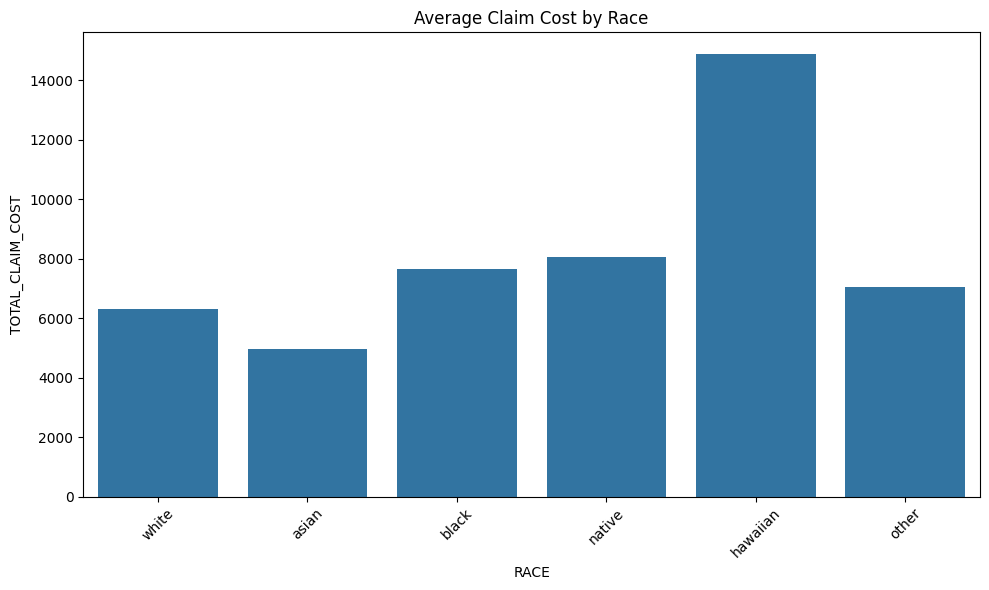

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(data=full_data, x='RACE', y='TOTAL_CLAIM_COST', estimator='mean',errorbar=None)
plt.title("Average Claim Cost by Race")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


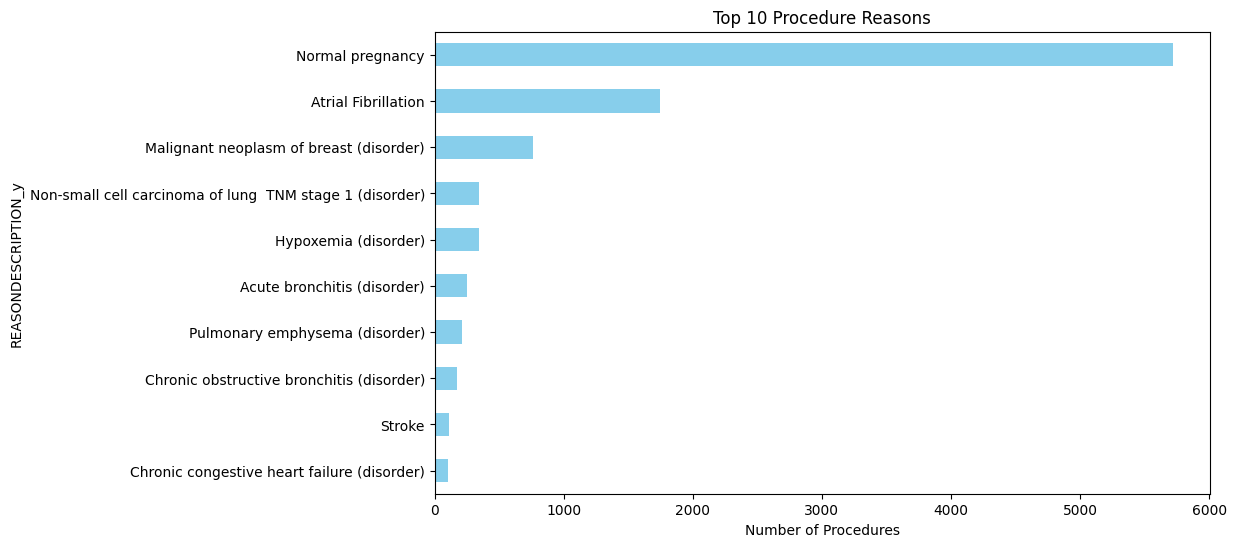

In [88]:
top_reasons = full_data['REASONDESCRIPTION_y'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_reasons.plot(kind='barh', color='skyblue')
plt.title("Top 10 Procedure Reasons")
plt.xlabel("Number of Procedures")
plt.gca().invert_yaxis()
plt.show()


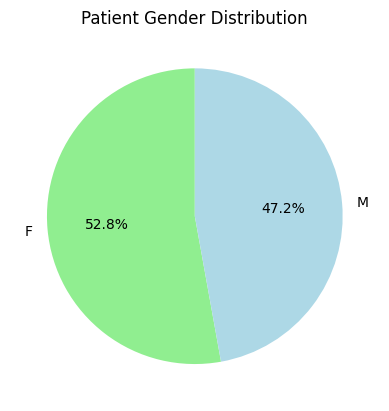

In [89]:
gender_counts = full_data['GENDER'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightblue'])
plt.title("Patient Gender Distribution")
plt.ylabel('')
plt.show()


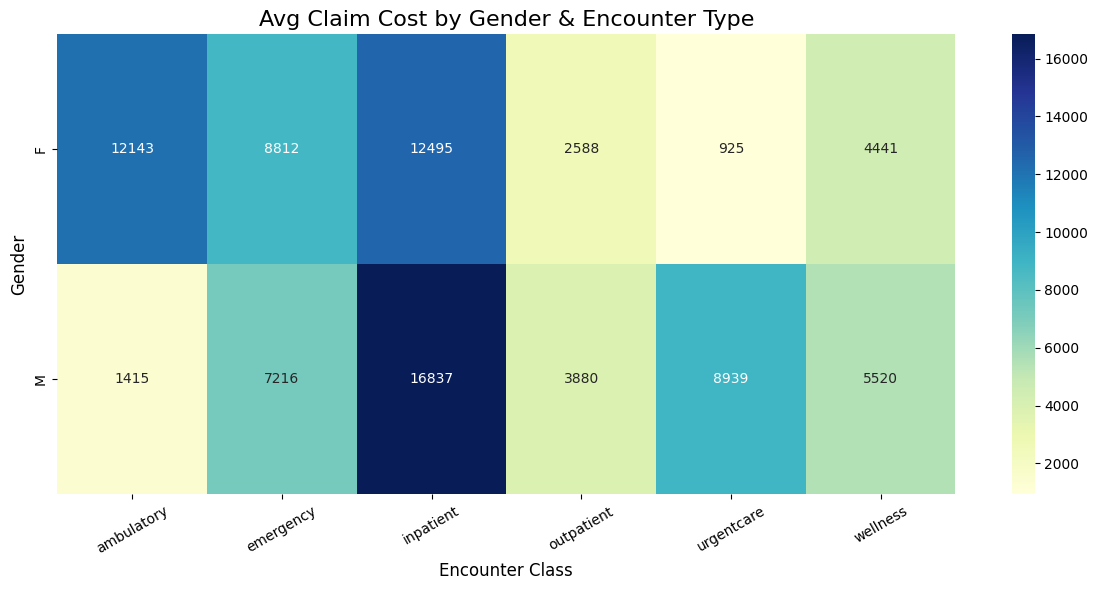

In [91]:

pivot = pd.pivot_table(
    full_data,
    values='TOTAL_CLAIM_COST',
    index='GENDER',
    columns='ENCOUNTERCLASS',
    aggfunc='mean',
    fill_value=0
)


plt.figure(figsize=(12, 6)) 
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Avg Claim Cost by Gender & Encounter Type", fontsize=16)
plt.xlabel("Encounter Class", fontsize=12)
plt.ylabel("Gender", fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



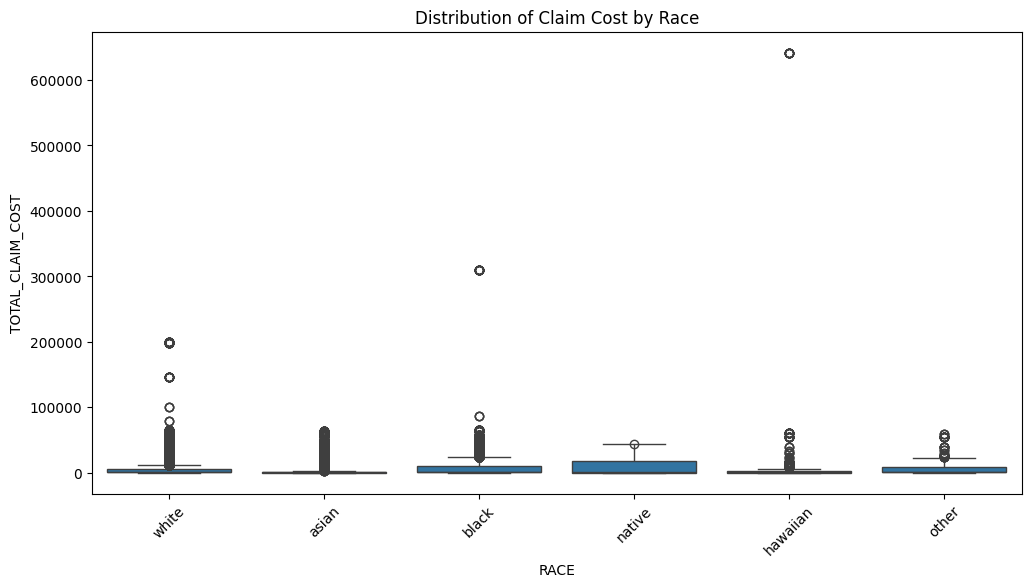

In [92]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=full_data, x='RACE', y='TOTAL_CLAIM_COST')
plt.xticks(rotation=45)
plt.title("Distribution of Claim Cost by Race")
plt.show()


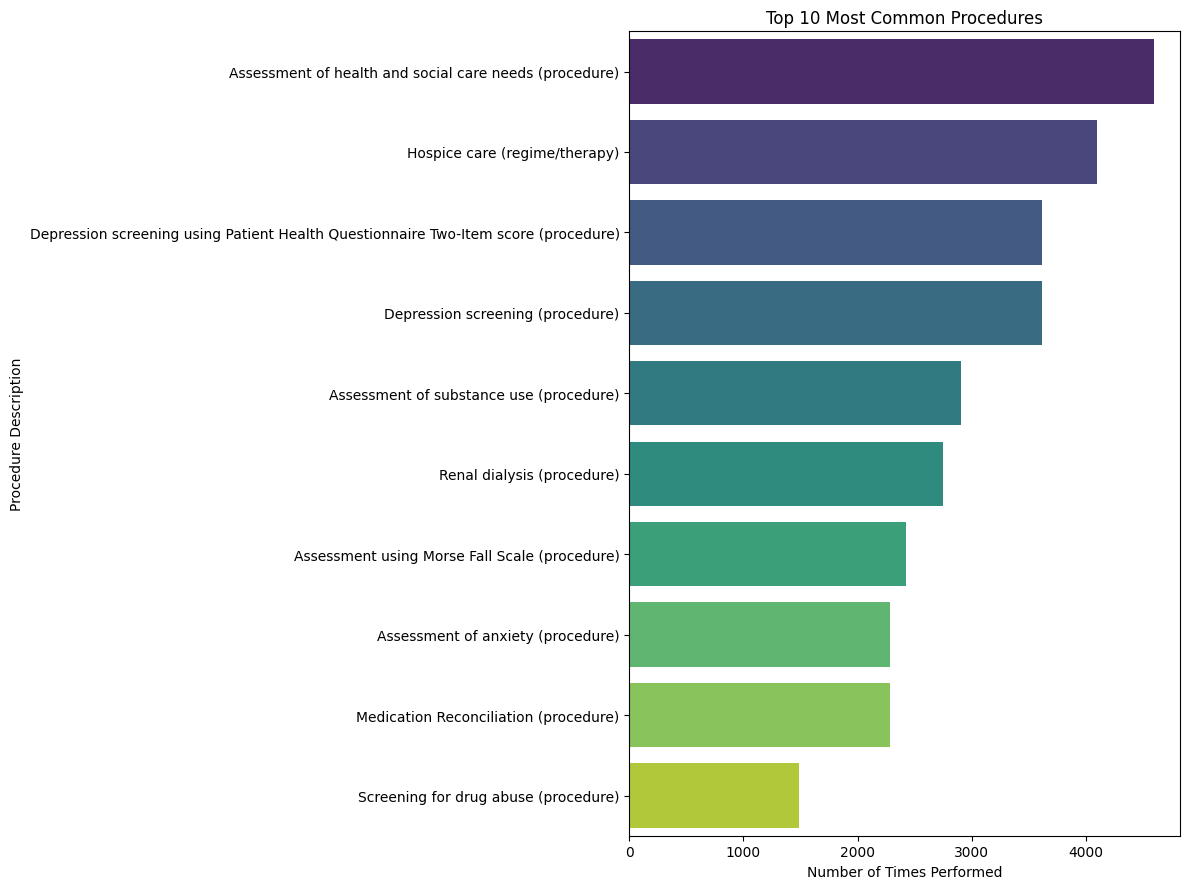

In [96]:
top_procedures = full_data['DESCRIPTION_y'].value_counts().nlargest(10)

plt.figure(figsize=(12, 9))
sns.barplot(x=top_procedures.values, y=top_procedures.index,hue=top_procedures.index, palette='viridis')
plt.title("Top 10 Most Common Procedures")
plt.xlabel("Number of Times Performed")
plt.ylabel("Procedure Description")
plt.tight_layout()
plt.show()


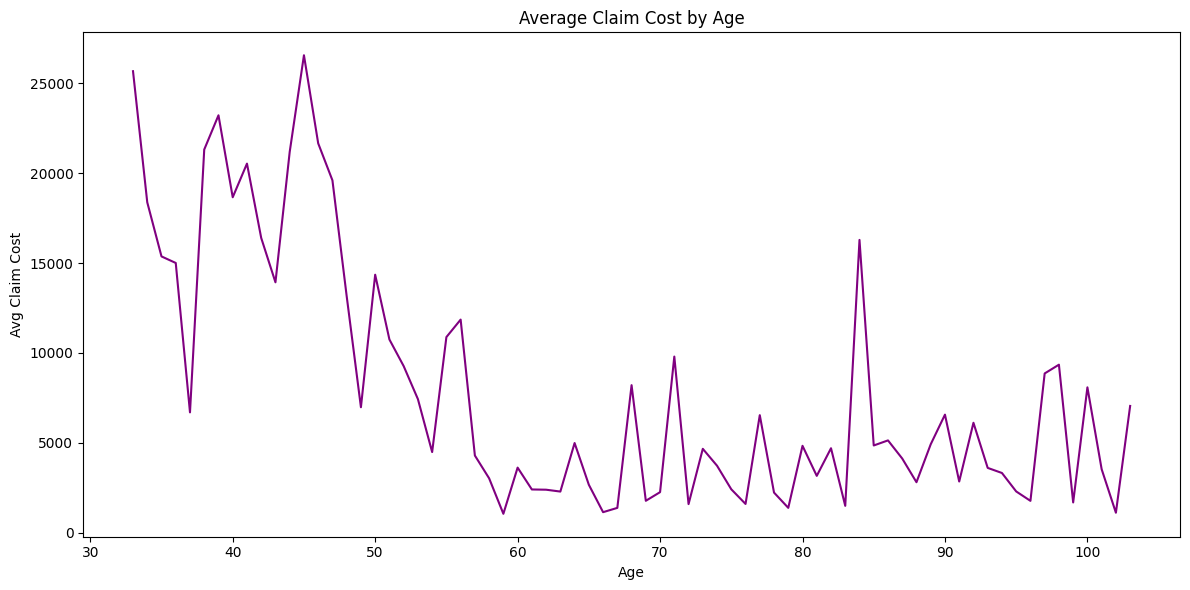

In [102]:
age_cost = full_data.groupby('AGE')['TOTAL_CLAIM_COST'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=age_cost, x='AGE', y='TOTAL_CLAIM_COST', color='purple')
plt.title("Average Claim Cost by Age")
plt.xlabel("Age")
plt.ylabel("Avg Claim Cost")
plt.tight_layout()
plt.show()
